In [20]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from scipy import stats as st
import matplotlib.pyplot as plt
from pylab import mpl
import datetime as dt

ticker = ['^GSPC', 'AAPL', 'ES=F', 'CL=F']

data = pdr.DataReader(ticker,'yahoo',start=dt.date(2010,1,1),end=dt.date.today())['Adj Close']

#returns = data.pct_change().dropna()


log_re = np.log(data/data.shift(1))


log_re


Symbols,^GSPC,AAPL,ES=F,CL=F
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.003111,0.001727,0.003096,0.003185
2010-01-06,0.000545,-0.016034,0.000662,0.017097
2010-01-07,0.003993,-0.001850,0.003964,-0.006271
2010-01-08,0.002878,0.006626,0.003510,0.001088
...,...,...,...,...
2021-12-09,-0.007207,-0.002975,-0.006833,-0.019819
2021-12-10,0.009504,0.027628,0.009384,0.010238
2021-12-13,-0.009178,-0.020891,-0.009009,-0.005316


In [38]:
I = 10000000
w=np.array([0.25,0.25,0.25,0.25])

#Error factor if following t stat
e1 = np.random.standard_t(df=len(log_re), size = I)

#Error factor if following normal
e2 = np.random.standard_normal(size = I)

#Last closing price of each asset
s0 = np.array(data.iloc[-1])

#Annual return and volatility
Rmean = log_re.mean()*252
Rvol = log_re.std()*np.sqrt(252)

#Time interval
t = 1/252

#Create a 10000X5 zero matrix
s1 = np.zeros(shape = (I, len(w)))

#Random process
for i in range (len(w)):
    s1[:,i] = s0[i]*np.exp((Rmean[i] - 0.5*Rvol[i]**2)*t + Rvol[i]*e1*np.sqrt(t))
    
Sp = (np.dot(s1/s0 - 1, w)*1e5)
      
Sp

array([-2233.37375406,   892.4177687 ,  1294.75244848, ...,
       -1083.30514745, -1260.45956331,    68.39213018])

1e5

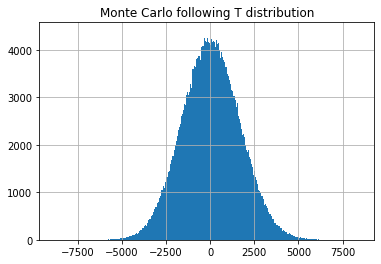

<Figure size 1080x1080 with 0 Axes>

In [34]:
fig, ax = plt.subplots()

ax.hist(Sp, bins = 10000)

ax.grid()

plt.title('Monte Carlo following T distribution')

plt.figure(figsize=(15,15))

plt.show()


In [35]:
Var= abs(np.percentile(Sp,1))
Var

3696.873845846859